In [10]:
import numpy as np
import xgboost as xgb
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from art.estimators.classification import XGBoostClassifier
from art.attacks.evasion import SamplingAttack
from art.estimators.classification import SklearnClassifier
import matplotlib.pyplot as plt

In [17]:
data = load_breast_cancer()
X_train, y_train = data.data[:400], data.target[:400]
X_test, y_test = data.data[400:], data.target[400:]
clip_values=(X_train.min(), X_train.max())

# Decision Tree
dt_model = DecisionTreeClassifier().fit(X_train, y_train)
dt_classifier = SklearnClassifier(model=dt_model, clip_values=clip_values)

# Random Forest
rf_model = RandomForestClassifier().fit(X_train, y_train)
rf_classifier = SklearnClassifier(model=rf_model, clip_values=clip_values)

# XGBoost
xgb_model = xgb.XGBClassifier().fit(X_train, y_train)
xgb_classifier = XGBoostClassifier(model=xgb_model, clip_values=clip_values)


d:\CapstoneProject\Auto-Defense-ML\venv\Lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The attribute `n_features_` is deprecated in 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)
d:\CapstoneProject\Auto-Defense-ML\venv\Lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


In [18]:
def run_attack(classifier, model_name, X_test, y_test):
    # Evaluate the original accuracy
    original_preds = np.argmax(classifier.predict(X_test), axis=1)
    original_accuracy = accuracy_score(y_test, original_preds)
    print(f"Original Accuracy ({model_name}): {original_accuracy}")

    # Apply the Sampling Attack
    attack = SamplingAttack(classifier, eps=0.1, n_trials=10)
    X_test_adv = attack.generate(X_test, y_test)

    # Evaluate the adversarial accuracy
    adv_preds = np.argmax(classifier.predict(X_test_adv), axis=1)
    adversarial_accuracy = accuracy_score(y_test, adv_preds)
    print(f"Adversarial Accuracy ({model_name}): {adversarial_accuracy}")

    # Show an example of an adversarial example against its original
    print(f"Original Example ({model_name}):", X_test[0])
    print(f"Adversarial Example ({model_name}):", X_test_adv[0])

    # Calculate the differences
    differences = X_test_adv[0] - X_test[0]
    print(f"Differences ({model_name}):", differences)

    # Plot the differences
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title(f"Original Example Feature Values ({model_name})")
    plt.bar(range(len(X_test[0])), X_test[0])
    plt.yscale('log')  # Use a logarithmic scale to better visualize the differences
    plt.xlabel('Feature Index')
    plt.ylabel('Feature Value')

    plt.subplot(1, 2, 2)
    plt.title(f"Adversarial Example Feature Values ({model_name})")
    plt.bar(range(len(X_test_adv[0])), X_test_adv[0])
    plt.yscale('log')
    plt.xlabel('Feature Index')
    plt.ylabel('Feature Value')

    plt.tight_layout()
    plt.show()

Original Accuracy (Decision Tree): 0.8698224852071006
Adversarial Accuracy (Decision Tree): 0.3076923076923077
Original Example (Decision Tree): [1.791e+01 2.102e+01 1.244e+02 9.940e+02 1.230e-01 2.576e-01 3.189e-01
 1.198e-01 2.113e-01 7.115e-02 4.030e-01 7.747e-01 3.123e+00 4.151e+01
 7.159e-03 3.718e-02 6.165e-02 1.051e-02 1.591e-02 5.099e-03 2.080e+01
 2.778e+01 1.496e+02 1.304e+03 1.873e-01 5.917e-01 9.034e-01 1.964e-01
 3.245e-01 1.198e-01]
Adversarial Example (Decision Tree): [ 1.78672265e+01  2.10780365e+01  1.24469774e+02  9.94051117e+02
  1.23170087e-01  2.69836655e-01  3.36099313e-01  2.11813953e-01
  1.16014236e-01  4.98371761e-02  3.09639169e-01  7.36588692e-01
  3.11717465e+00  4.15679988e+01 -1.55818928e-02  7.19146815e-02
  1.02845446e-01  2.26907239e-02 -7.52738959e-02 -2.83088986e-02
  2.08449862e+01  2.77596040e+01  1.49576449e+02  1.30398458e+03
  1.78756335e-01  6.50263089e-01  8.88949921e-01  1.27973023e-01
  4.20037769e-01  1.92884989e-01]
Differences (Decision T

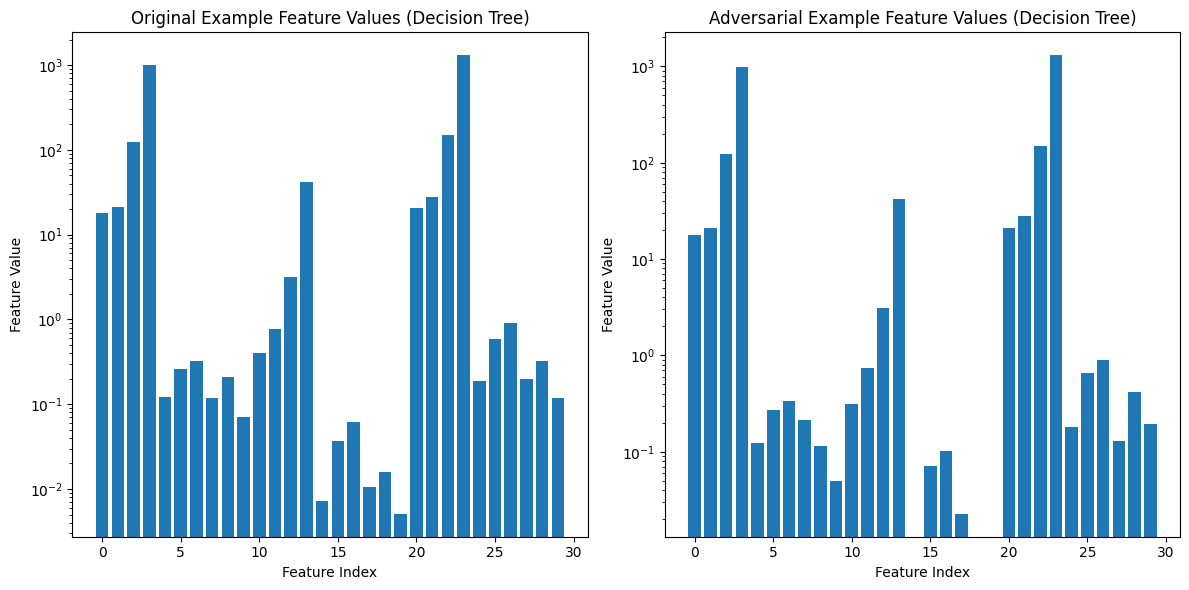

In [19]:
run_attack(dt_classifier, "Decision Tree", X_test, y_test)

Original Accuracy (Random Forest): 0.9763313609467456
Adversarial Accuracy (Random Forest): 0.8224852071005917
Original Example (Random Forest): [1.791e+01 2.102e+01 1.244e+02 9.940e+02 1.230e-01 2.576e-01 3.189e-01
 1.198e-01 2.113e-01 7.115e-02 4.030e-01 7.747e-01 3.123e+00 4.151e+01
 7.159e-03 3.718e-02 6.165e-02 1.051e-02 1.591e-02 5.099e-03 2.080e+01
 2.778e+01 1.496e+02 1.304e+03 1.873e-01 5.917e-01 9.034e-01 1.964e-01
 3.245e-01 1.198e-01]
Adversarial Example (Random Forest): [ 1.78170114e+01  2.09484034e+01  1.24499839e+02  9.94015413e+02
  4.68471211e-02  3.33544122e-01  2.58825683e-01  1.62106658e-01
  2.33217666e-01  1.04724154e-01  3.31666725e-01  7.29517101e-01
  3.15065879e+00  4.15940319e+01  7.54833445e-02  5.77709682e-02
 -3.81204968e-02 -6.67972718e-02  8.56108676e-02 -9.39468300e-02
  2.07560651e+01  2.77587144e+01  1.49639231e+02  1.30405106e+03
  2.08741454e-01  6.45250623e-01  9.38967304e-01  1.32107736e-01
  3.40439913e-01  8.04193068e-02]
Differences (Random For

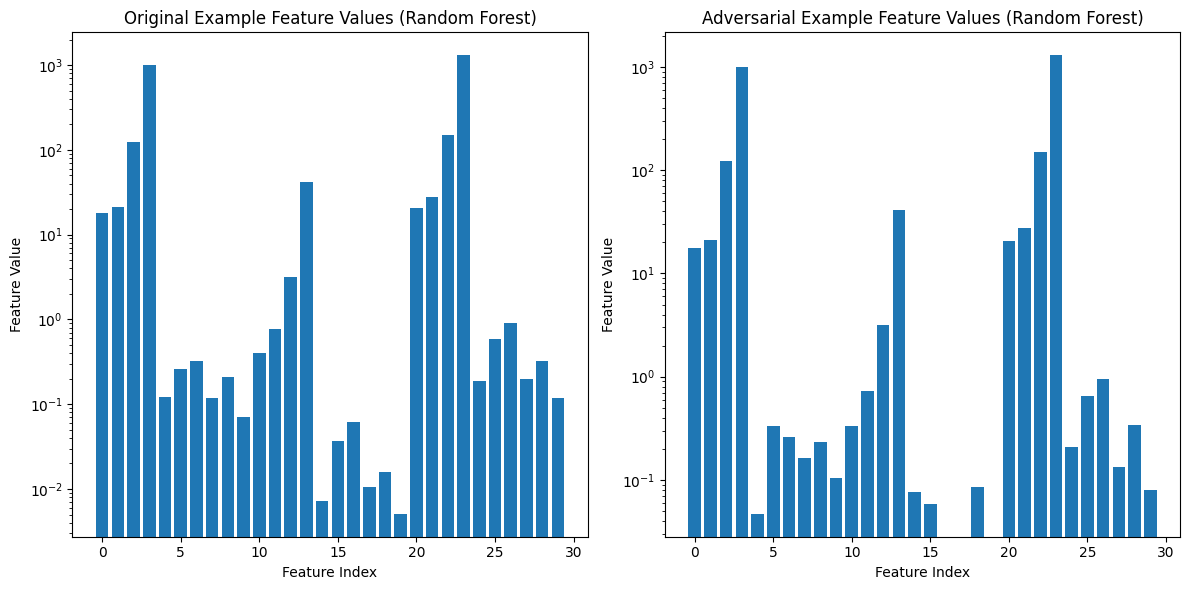

In [15]:
run_attack(rf_classifier, "Random Forest", X_test, y_test)

Original Accuracy (XGBoost): 0.9585798816568047
Adversarial Accuracy (XGBoost): 0.7633136094674556
Original Example (XGBoost): [1.791e+01 2.102e+01 1.244e+02 9.940e+02 1.230e-01 2.576e-01 3.189e-01
 1.198e-01 2.113e-01 7.115e-02 4.030e-01 7.747e-01 3.123e+00 4.151e+01
 7.159e-03 3.718e-02 6.165e-02 1.051e-02 1.591e-02 5.099e-03 2.080e+01
 2.778e+01 1.496e+02 1.304e+03 1.873e-01 5.917e-01 9.034e-01 1.964e-01
 3.245e-01 1.198e-01]
Adversarial Example (XGBoost): [ 1.79219264e+01  2.10754971e+01  1.24440008e+02  9.93917526e+02
  1.60224157e-01  1.66616564e-01  2.37045361e-01  1.07936494e-01
  2.11566713e-01  4.21781848e-02  4.13289606e-01  8.07017512e-01
  3.10585633e+00  4.15510631e+01 -6.66994457e-02  1.25355829e-01
  8.56209125e-02 -4.93171652e-02 -4.90363613e-02  3.46129102e-02
  2.08337289e+01  2.77875744e+01  1.49503953e+02  1.30404813e+03
  1.79297771e-01  5.53879020e-01  8.42610710e-01  1.27267753e-01
  2.28196252e-01  1.15630107e-01]
Differences (XGBoost): [ 0.01192643  0.05549708

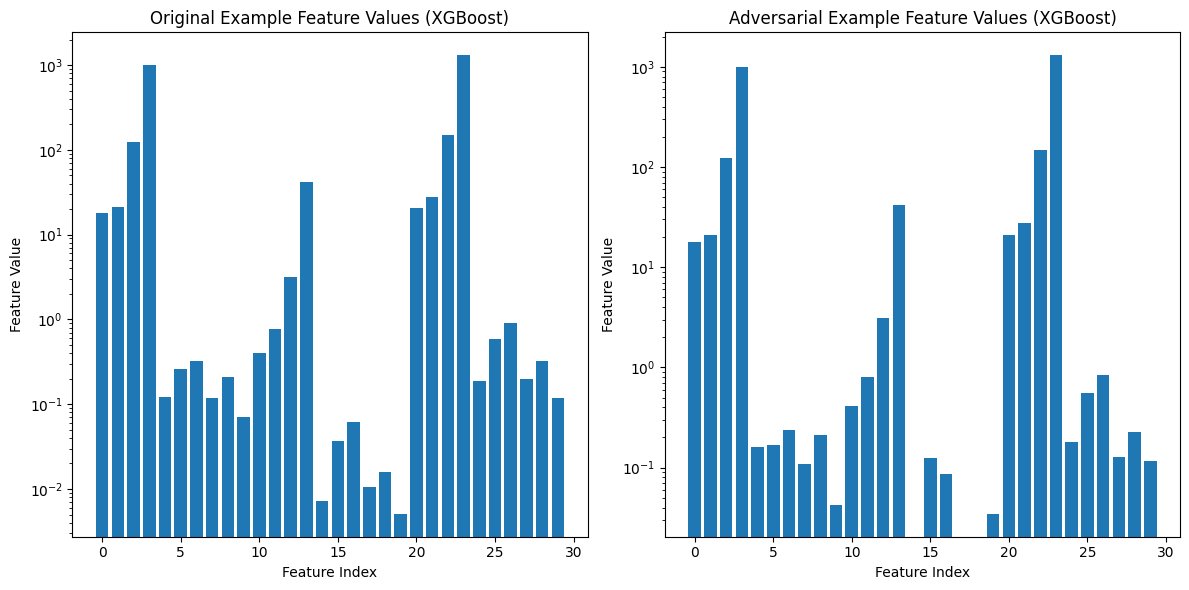

In [16]:
run_attack(xgb_classifier, "XGBoost", X_test, y_test)